In [251]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460,232,178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])



In [252]:

def predict_single_loop(x,w,b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p




In [253]:
x_vec = x_train[0,:]
print(x_vec)
f_wb = predict_single_loop(x_vec,w_init,b_init)
print(f"Prediction {f_wb}")

[2104    5    1   45]
Prediction 459.9999976194083


In [254]:
def predict(x,w,b):
    p = np.dot(x,w)
    return p + b

In [255]:
prediction = predict(x_vec,w_init,b_init)
print(prediction)

459.9999976194083



# 4 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [256]:
def compute_cost(x,y,w,b):
    tot_cost = 0.0
    m = x.shape[0]
    for i in range(m):
        f_wb_i = np.dot(x[i],w)+b
        tot_cost = (f_wb_i - y[i])**2+ tot_cost
    tot_cost = tot_cost/(2*m)
    return tot_cost

In [257]:
Total_cost = compute_cost(x_train,y_train,w_init,b_init)
print(f'Cost at optiomal w:{Total_cost}')




Cost at optiomal w:1.5578904428966628e-12



# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value



## 5.1 Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.
   

In [258]:

def compute_gradient(x,y,w,b):
    row,column = x.shape
    dj_dw = np.zeros(column)
    dj_db = 0
    for i in range(row):
        err = (np.dot(x[i],w)+b) - y[i]
        for j in range(column):
            dj_dw[j] = dj_dw[j] + err * x[i,j]
        dj_db = dj_db + err
    dj_db = dj_db/ row
    dj_dw = dj_dw/row
    return dj_dw,dj_db
    


    



In [259]:
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


## 5.2 Gradient Descent With Multiple Variables

In [260]:
import copy

def gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, num_iter):
    J_history = []  # To store the cost at each iteration
    w = copy.deepcopy(w_init)  # Deep copy to avoid modifying the original weights
    b = b_init
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)  # Use updated w and b in gradient
        
        # Update weights and bias
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Compute and store the cost for every iteration
        if i < 100000:
            J_history.append(compute_cost(x_train, y_train, w, b))
            
        # Print progress every 10% of iterations
        if i % math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:.4f}")
    
    return w, b, J_history


In [261]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 2529.4630
Iteration  100: Cost 695.9903
Iteration  200: Cost 694.9207
Iteration  300: Cost 693.8604
Iteration  400: Cost 692.8094
Iteration  500: Cost 691.7676
Iteration  600: Cost 690.7349
Iteration  700: Cost 689.7112
Iteration  800: Cost 688.6965
Iteration  900: Cost 687.6906
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


# Feature Engineering and Polynomial Regression Overview

Out of the box, linear regression provides a means of building models of the form:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 
What if your features/data are non-linear or are combinations of features? For example,  Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.

## Polynomial Features

Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: $y = 1+x^2$

You're familiar with all the routines we're using. They are available in the lab_utils.py file for review. We'll use [`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) which is a NumPy routine to concatenate along the column boundary.

In [262]:
# Left

#  Linear Regression using Scikit-Learn

In [263]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(x_train)
print(X_norm)
print(x_train)
print(f"Peak to Peak ranges in column Raw X:{np.ptp(x_train,axis = 0)}")
print(f"Peak to Peak ranges in column Raw X:{np.ptp(X_norm,axis = 0)}")

[[ 1.26311506  1.33630621 -0.70710678  1.22474487]
 [-0.08073519 -0.26726124  1.41421356  0.        ]
 [-1.18237987 -1.06904497 -0.70710678 -1.22474487]]
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Peak to Peak ranges in column Raw X:[1252    3    1   10]
Peak to Peak ranges in column Raw X:[2.44549494 2.40535118 2.12132034 2.44948974]


### Create and fit the regression model

In [264]:
sgdr = SGDRegressor(max_iter=100000)
sgdr.fit(X_norm,y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=100000)
number of iterations completed: 1239, number of weight updates: 3718.0


In [265]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [ 38.05254837  41.53898548 -30.94974614  36.34495086], b:[289.50556013]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [266]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[459.47717894 231.56206884 177.47743261]
Target values 
[460 232 178]


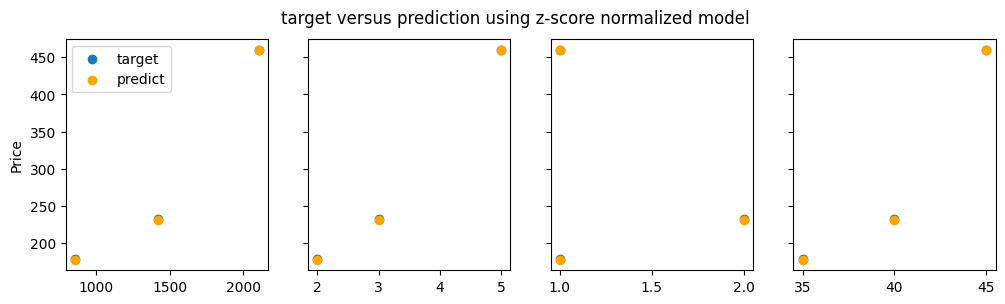

In [267]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].scatter(x_train[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()